In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from web_tool.DataLoader import DataLoaderLCLayer, DataLoaderUSALayer
from web_tool.Utils import COLOR_MAP_LC4
CMAP_LC = matplotlib.colors.ListedColormap(COLOR_MAP_LC4)

In [2]:
# Georgia Tech polygon -- created haphazardly on http://geojson.io/
geom = {"type":"Polygon","coordinates":[[[-84.40798044204712,33.7709248470267],[-84.3883466720581,33.7709248470267],[-84.3883466720581,33.781876094145616],[-84.40798044204712,33.781876094145616],[-84.40798044204712,33.7709248470267]]]}

In [3]:
lc_loader = DataLoaderLCLayer(padding=0)
naip_loader = DataLoaderUSALayer(padding=0)

In [4]:
lc_data = lc_loader.get_data_from_geometry(geom)
naip_data = naip_loader.get_data_from_geometry(geom)

Found 1 intersections, returning at 1_3_2019/data/v1/2010/states/ga/ga_1m_2010/33084/m_3308413_se_16_1_20100811_probs.tif
Found 10 intersections, returning at v002/ga/2019/ga_60cm_2019/33084/m_3308413_se_16_060_20190910.tif


In [5]:
lc_data.shape # this is height x width x per-class probabilities

(1262, 1851, 4)

In [6]:
lc_data = lc_data.data.argmax(axis=2)

In [7]:
naip_data.shape # this is height x width x channels -- the channels are R,G,B,NIR

(2102, 3083, 4)

In [8]:
naip_data = naip_data.data[:,:,:3] # Keep the RGB channels

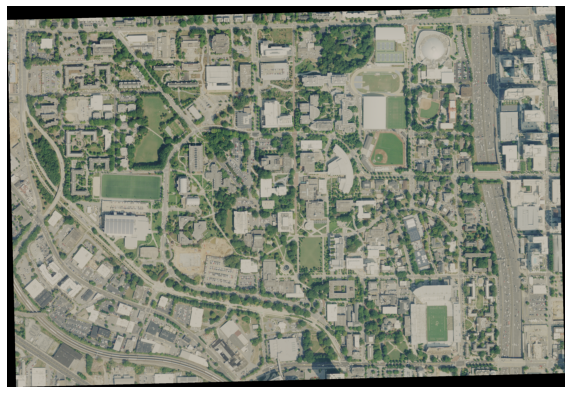

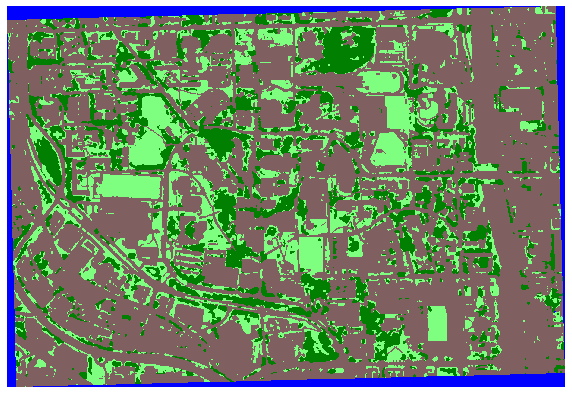

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(naip_data)
plt.axis("off")
plt.show()
plt.close()

plt.figure(figsize=(10,10))
plt.imshow(lc_data, cmap=CMAP_LC, vmin=0, vmax=3, interpolation="none")
plt.axis("off")
plt.show()
plt.close()